In [1]:
from DataGenerator import DataGenerator as DG
from tqdm import tqdm
import utils as ut
import matplotlib.pyplot as plt
import os
import numpy as np
SEED=42


In [2]:
# Set the Parameters
params={'num_samples':6000,
        'num_wells':4,
        'width':10,
        'd_hole':0.1,
        'd_med':1,
        'HF_N':128,
        'LF_N':16,
        'num_train':700,
        'num_test':200,
        'num_val':100
        }
data_dir='./data'
lengths_dir=os.path.join(data_dir,'lengths')
y_dir=os.path.join(data_dir,'y')

In [ ]:
# Generate, label and save the data

# Initialize DG and other variables
dg = DG(params)
geo_list = dg.generate_geo(seed=SEED)
lengths_array = np.zeros((params['num_samples'], params['num_wells']))
y_array = np.zeros((params['num_samples'], params['HF_N']))
log_interval = 100
log_file_path = './data_labeling_log.txt'

# Check if the log file exists, delete it if it does
if os.path.exists(log_file_path):
    os.remove(log_file_path)

# Create the log file
with open(log_file_path, 'w') as log_file:
    log_file.write("Log file created\n")

# Processing loop
for i, geo in enumerate(tqdm(geo_list, desc='Labeling data')):
    lengths = geo.lengths
    lengths_array[i] = lengths
    y = ut.label_lengths(lengths, params)
    y_array[i] = y
    if (i + 1) % log_interval == 0:
        with open(log_file_path, 'a') as log_file:
            log_file.write(f"Processed {i + 1} samples\n")


Labeling data:   0%|          | 12/6000 [01:18<10:11:28,  6.13s/it]

In [7]:
np.save(y_dir,y_array)
np.save(lengths_dir,lengths_array)

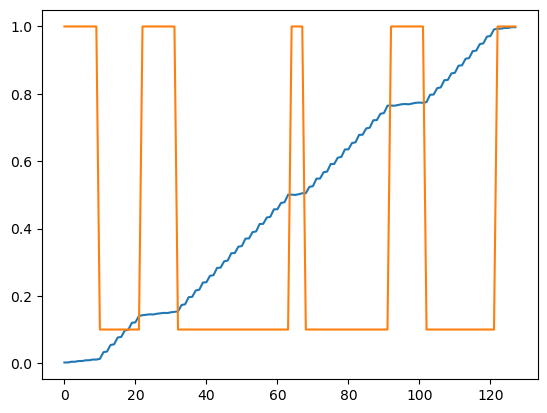

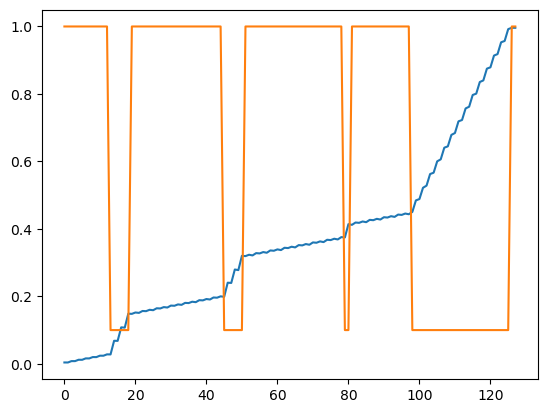

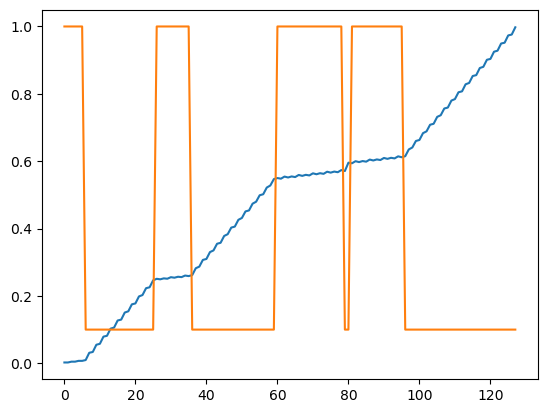

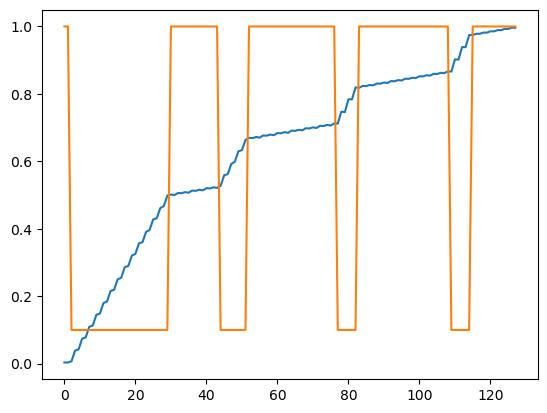

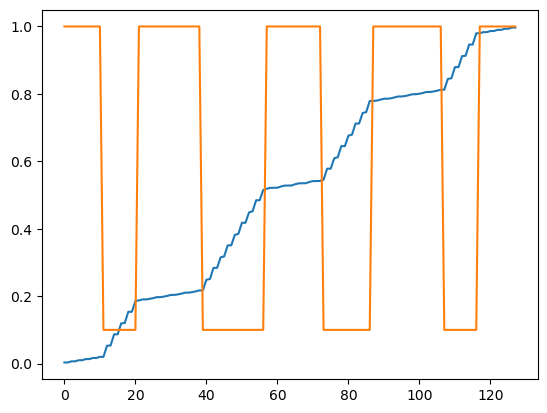

In [10]:
# Simple Check
check_num=5
for i in range(5):
    d=geo_list[i].get_D(N=params['HF_N'])
    y=y_array[i]
    plt.plot(y)
    plt.plot(d)
    plt.show()